In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
 
%matplotlib inline

# Read dataseta

In [117]:
# read dataset
data = pd.read_csv('Dataset_edited/new_data.csv')

In [118]:
data.head(10)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,Target
0,41.0,F,f,f,f,f,f,f,f,f,f,f,f,1.30,2.5,125.0,1.14,109.0,negative
1,23.0,F,f,f,f,f,f,f,f,f,f,f,f,4.10,2.0,102.0,NaN,NaN,negative
2,46.0,M,f,f,f,f,f,f,f,f,f,f,f,0.98,NaN,109.0,0.91,120.0,negative
3,70.0,F,t,f,f,f,f,f,f,f,f,f,f,0.16,1.9,175.0,NaN,NaN,negative
4,70.0,F,f,f,f,f,f,f,f,f,f,f,f,0.72,1.2,61.0,0.87,70.0,negative
5,18.0,F,t,f,f,f,f,f,f,f,f,f,f,0.03,NaN,183.0,1.30,141.0,negative
6,59.0,F,f,f,f,f,f,f,f,f,f,f,f,NaN,NaN,72.0,0.92,78.0,negative
7,80.0,F,f,f,f,f,f,f,f,f,f,f,f,2.20,0.6,80.0,0.70,115.0,negative
8,66.0,F,f,f,f,f,f,f,f,f,f,f,t,0.60,2.2,123.0,0.93,132.0,negative
9,68.0,M,f,f,f,f,f,f,f,f,f,f,f,2.40,1.6,83.0,0.89,93.0,negative


# Univariate data analysis

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25453 entries, 0 to 25452
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        25005 non-null  float64
 1   sex                        24830 non-null  object 
 2   on_thyroxine               25453 non-null  object 
 3   query_on_thyroxine         25453 non-null  object 
 4   on_antithyroid_medication  25453 non-null  object 
 5   sick                       25453 non-null  object 
 6   pregnant                   25453 non-null  object 
 7   thyroid_surgery            25453 non-null  object 
 8   query_hypothyroid          25453 non-null  object 
 9   query_hyperthyroid         25453 non-null  object 
 10  lithium                    25453 non-null  object 
 11  goitre                     25453 non-null  object 
 12  tumor                      25453 non-null  object 
 13  TSH                        23525 non-null  flo

### Data infomation
1. The size: 3.7+ MB
2. 25453 instances
3. 19 columns

## Missing Valuea

### _age_ missing value

In [120]:
(data.shape[0]-data['age'].count())/data.shape[0]

0.01760106863631006

In [121]:
data.groupby(['age'])[['Target']].count()

,Target
age,
1.0,38
2.0,22
3.0,4
4.0,8
5.0,6
...,...
98.0,1
455.0,3
65511.0,1


It is impossible that age is more than 100. Therefore, delete these data

In [122]:
data = data.drop(data[data['age']>100].index)

In [123]:
data.shape

(25447, 19)

In [124]:
data[data['age'].isna()].count()

age                            0
sex                          392
on_thyroxine                 448
query_on_thyroxine           448
on_antithyroid_medication    448
sick                         448
pregnant                     448
thyroid_surgery              448
query_hypothyroid            448
query_hyperthyroid           448
lithium                      448
goitre                       448
tumor                        448
TSH                          406
T3                           389
TT4                          419
T4U                          419
FTI                          419
Target                       448
dtype: int64

In [125]:
data.groupby(['age'])[['Target']].count()

,Target
age,
1.0,38
2.0,22
3.0,4
4.0,8
5.0,6
...,...
93.0,13
94.0,9
95.0,4


In [126]:
data.age.count()

24999

1. The missing rate is: 1.76%
2. The number of missing value: 448
3. The number of non-missing value: 25005

### _Sex_ missing value

In [127]:
(data.shape[0]-data['sex'].count())/data.shape[0]

0.02448225724053916

In [128]:
data[data['sex'].isna()].count()

age                          567
sex                            0
on_thyroxine                 623
query_on_thyroxine           623
on_antithyroid_medication    623
sick                         623
pregnant                     623
thyroid_surgery              623
query_hypothyroid            623
query_hyperthyroid           623
lithium                      623
goitre                       623
tumor                        623
TSH                          553
T3                           491
TT4                          571
T4U                          549
FTI                          549
Target                       623
dtype: int64

In [129]:
data.sex.count()

24824

In [130]:
data.groupby(['sex'])[['Target']].count()

,Target
sex,
F,17047
M,7777


1. The missing rate is: 2.448%
2. The number of missing value: 623
3. The number of non-missing value: 24824 (17047 Female and 7777 Male)

### _TSH_ Missing Value

In [131]:
(data.shape[0]-data['TSH'].count())/data.shape[0]

0.07576531614728652

In [132]:
data[data['TSH'].isna()].count()

age                          1886
sex                          1858
on_thyroxine                 1928
query_on_thyroxine           1928
on_antithyroid_medication    1928
sick                         1928
pregnant                     1928
thyroid_surgery              1928
query_hypothyroid            1928
query_hyperthyroid           1928
lithium                      1928
goitre                       1928
tumor                        1928
TSH                             0
T3                            457
TT4                           985
T4U                           958
FTI                           958
Target                       1928
dtype: int64

In [133]:
data.TSH.count()

23519

1. TSH missing rate: 7.577%
2. TSH missed 1928 instances
3. Non-missing: 23519 instances

### _T3_ Missing Value

In [134]:
(data.shape[0]-data['T3'].count())/data.shape[0]

0.17451958973552875

In [135]:
data[data['T3'].isna()].count()

age                          4382
sex                          4309
on_thyroxine                 4441
query_on_thyroxine           4441
on_antithyroid_medication    4441
sick                         4441
pregnant                     4441
thyroid_surgery              4441
query_hypothyroid            4441
query_hyperthyroid           4441
lithium                      4441
goitre                       4441
tumor                        4441
TSH                          2970
T3                              0
TT4                          3524
T4U                          3510
FTI                          3511
Target                       4441
dtype: int64

In [136]:
data.T3.count()

21006

1. T3 missing rate: 17.452%
2. T3 missed 4441 instances
3. Non-missing: 21006 instances

### _TT4_ Missing Value

In [137]:
(data.shape[0]-data['TT4'].count())/data.shape[0]

0.041851691751483476

In [138]:
data[data['TT4'].isna()].count()

age                          1036
sex                          1013
on_thyroxine                 1065
query_on_thyroxine           1065
on_antithyroid_medication    1065
sick                         1065
pregnant                     1065
thyroid_surgery              1065
query_hypothyroid            1065
query_hyperthyroid           1065
lithium                      1065
goitre                       1065
tumor                        1065
TSH                           122
T3                            148
TT4                             0
T4U                             9
FTI                            17
Target                       1065
dtype: int64

In [139]:
data.TT4.count()

24382

1. TT4 missing rate: 4.185%
2. TT4 missed 1065 instances
3. Non-missing: 24382 instances

### _T4U_ Missing Value

In [140]:
(data.shape[0]-data['T4U'].count())/data.shape[0]

0.06672692262349196

In [141]:
data[data['T4U'].isna()].count()

age                          1669
sex                          1624
on_thyroxine                 1698
query_on_thyroxine           1698
on_antithyroid_medication    1698
sick                         1698
pregnant                     1698
thyroid_surgery              1698
query_hypothyroid            1698
query_hyperthyroid           1698
lithium                      1698
goitre                       1698
tumor                        1698
TSH                           728
T3                            767
TT4                           642
T4U                             0
FTI                            13
Target                       1698
dtype: int64

In [142]:
data.T4U.count()

23749

1. T4U missing rate: 6.673%
2. T4U missed 1698 instances
3. Non-missing: 23749 instances

### _FTI_ Missing Value

In [143]:
(data.shape[0]-data['FTI'].count())/data.shape[0]

0.06625535426572877

In [144]:
data[data['FTI'].isna()].count()

age                          1657
sex                          1612
on_thyroxine                 1686
query_on_thyroxine           1686
on_antithyroid_medication    1686
sick                         1686
pregnant                     1686
thyroid_surgery              1686
query_hypothyroid            1686
query_hyperthyroid           1686
lithium                      1686
goitre                       1686
tumor                        1686
TSH                           716
T3                            756
TT4                           638
T4U                             1
FTI                             0
Target                       1686
dtype: int64

In [145]:
data.FTI.count()

23761

1. FTI missing rate: 6.626%
2. FTI missed 1686 instances
3. Non-missing: 23761 instances

# Data Distribution

### Statistical infomation

In [146]:
data.describe()

,age,TSH,T3,TT4,T4U,FTI
count,24999.000000,23519.000000,21006.000000,24382.000000,23749.00000,23761.000000
mean,51.791234,3.872467,2.001266,78.705925,3.64942,81.059710
std,18.892940,21.058445,0.821199,53.467455,4.18350,57.146811
min,1.000000,0.000000,0.000000,0.200000,0.00000,0.000000
25%,36.000000,0.150000,1.600000,13.500000,0.91000,13.300000
50%,54.000000,0.660000,2.000000,90.000000,1.05000,95.000000
75%,67.000000,2.000000,2.300000,114.000000,8.30000,116.000000
max,98.000000,530.000000,18.000000,450.000000,23.30000,881.000000


### positive(hypothyroid, hyperthyroid) vs Negative label

The number of target：
negative        23594
hypothyroid      1403
hyperthyroid      450
Name: Target, dtype: int64


<AxesSubplot:ylabel='Target'>

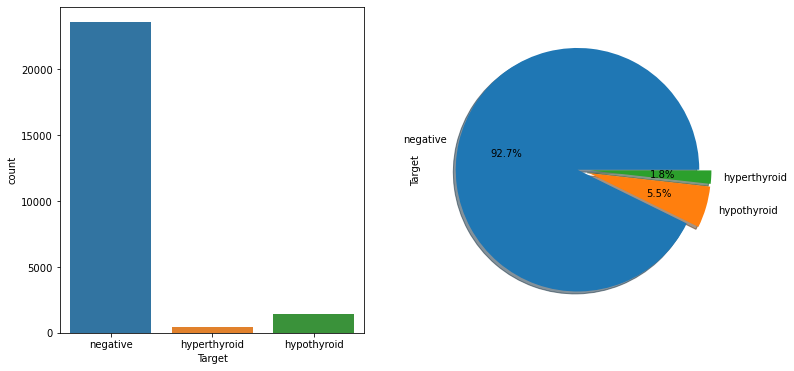

In [147]:
print('The number of target：')
print(data.Target.value_counts())

_,axe = plt.subplots(1,2,figsize=(12,6))
sns.countplot('Target',data=data,ax=axe[0])
data.Target.value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,explode=[0,0.1,0.1],ax=axe[1])

As can be seen from the above graph, the distribution of samples is uneven and certain measures are needed to deal with the sample imbalance:

- Similar to undersampling, a positive sample and a negative sample are combined to form a multi-sample training set, and multiple models are trained and averaged
- Adjusting the weights of the model